# ET Demand Test problem for Ag Package

#### Based on Sagehen example problem, model is run outside of notebook

In [1]:
%matplotlib inline
import sys, os
import matplotlib.pyplot as plt
#import arcpy
#import geopandas
import matplotlib.image as mpimg
#import ConfigParser
import numpy as np
import pandas as pd
import datetime
from Figures import ReportFigures
from matplotlib import cm
#from arcpy import env
from datetime import date
from datetime import timedelta
from dateutil.parser import parse
import matplotlib.dates as mdates
from dateutil.relativedelta import relativedelta

flopy is installed in C:\Users\rniswon\AppData\Local\Continuum\miniconda2\lib\site-packages\flopy-3.2.12-py2.7.egg\flopy


In [2]:
rf = ReportFigures()
rf.set_style()
sys.path.append('..')
python_exe = sys.executable

### Plot high and low monthly Kc vlaues

In [3]:
#open irrigation segment file again to read lines
fname1 = open(r"..\input\prms\jh_coef_month_high.in","r")
fname2 = open(r"..\input\prms\jh_coef_month_low.in","r")

Kc_high, Kc_low = [], []
    
# Read Kc values
lines1=fname1.readlines()
lines2=fname2.readlines()

# set high Kc values
i=-1
for line in lines1:
    i=i+1
    Kc_high.append(line.split()[1])
fname1.close()
# set low Kc values
i=-1
for line in lines2:
    i=i+1
    Kc_low.append(line.split()[1])
# close irrigation segment file
fname2.close()

C:\Users\rniswon\AppData\Local\Continuum\miniconda2\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family [u'Univers 57 Condensed'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\rniswon\AppData\Local\Continuum\miniconda2\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family [u'Univers 67 Condensed'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


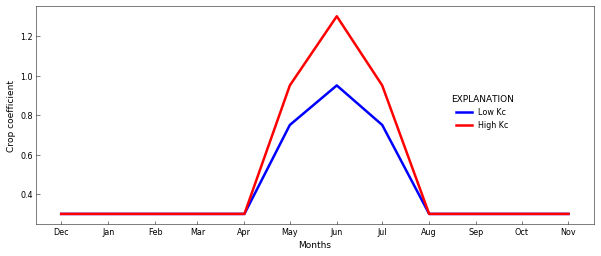

In [4]:
# set list of months
nummonths = 12
date_list = list()
for i in range(0, nummonths):
    date_list.append(datetime.date(1990, 12, 1)+relativedelta(months=i))

# plot Kc values
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
#fig, ax = plt.subplots()
x = plt.gca().xaxis
x.set_major_locator(locator)
# Specify formatter
x.set_major_formatter(fmt)
# Low Kc
ax.plot(date_list,Kc_low,color='b', linewidth=2.5, label='Low Kc')
# High Kc
ax.plot(date_list,Kc_high,color='r', linewidth=2.5, label='High Kc')
ax.set_ylabel('Crop coefficient')
ax.set_xlabel('Months')
handles, labels = ax.get_legend_handles_labels()
rf.legend(ax, handles, labels, bbox_to_anchor=(.8, 0.4))
plt.savefig('Fig8.png')

### Get size of gage files and set start and end dates for plotting

In [5]:
# calculate number of lines in file can be any gage file
num_lines = 0
with open(r"..\output_GSFLOW_only\modflow\sagehensfr18_HighKc.out", 'r') as f:
    for line in f:
        num_lines += 1

# set dates for daily values; this date is simulation starte date
dates = []
for i in range(num_lines-1): 
    dates.append(datetime.date(1990, 10, 1)+datetime.timedelta(days=i))
    
# set start and end dates for plot 
startdate, enddate, plotdates = [], [], []
startdate.append(datetime.date(1991, 3, 1))
enddate.append(datetime.date(1994, 3, 1))

In [6]:
#open daily precip file from Independence Lake; values are in meters 10/1/1990-9/31/2000
fname = open(r"..\input\prms\precip.dat","r")
firstline=fname.readline()
lines=fname.readlines()
precip = []
#print(len(lines))
# set variabes for plotting between startdate and enddate
i=-1
for line in lines:
    i=i+1
    if dates[i]>enddate[0]:
        break
    if dates[i]>=startdate[0]:
        precip.append(line.split()[0])
        
x=np.array(precip,dtype=float)
x=x*10.0
precip_cm=x
precip_cum=x.cumsum()


### Read and process the Ag diversion segment gage file for high Kc

In [7]:

#open irrigation segment file again to read lines
fname1 = open(r"..\output_GSFLOW_only\modflow\sagehensfr18_HighKc.out","r")
fname2 = open(r"..\output_GSFLOW_only\modflow\sagehensfr19_HighKc.out","r")
#set firstline for headers
firstline=fname1.readline()
# store all data from file in lines
lines1=fname1.readlines()
lines2=fname2.readlines()
y1_high_18, y2_high_18, y3_high_18, y4_high_18 = [], [], [], []
y1_high_19, y2_high_19, y3_high_19, y4_high_19 = [], [], [], []
y1_high_18_cum, y2_high_18_cum = [], []
# set variabes for plotting between startdate and enddate
i=-1
for line in lines1:
    i=i+1
    if dates[i]>enddate[0]:
        break
    if dates[i]>=startdate[0]:
        plotdates.append(dates[i])   #only once here
#        x.append(line.split()[0])
        y1_high_18.append(line.split()[4])
        y2_high_18.append(line.split()[5])
        y3_high_18.append(line.split()[6])
#
i=-1
for line in lines2:
    i=i+1
    if dates[i]>enddate[0]:
        break
    if dates[i]>=startdate[0]:
#        x.append(line.split()[0])
        y1_high_19.append(line.split()[4])
        y2_high_19.append(line.split()[5])
        y3_high_19.append(line.split()[6])
# close irrigation segment file
fname1.close()
fname2.close()

# sum segments
x1=np.array(y1_high_18,dtype=float)
# divide by irrigated area
x1=x1/1.134e5
x2=np.array(y1_high_19,dtype=float)
x2=x2/1.62e5
x1=x1+x2
y1_high_18=x1
y1_high_18_cum=x1.cumsum()

x1=np.array(y2_high_18,dtype=float)
# convert to hectare-meter
x1=x1/1.134e5
x2=np.array(y2_high_19,dtype=float)
x2=x2/1.62e5
x1=x1+x2
y2_high_18=x1

x1=np.array(y3_high_18,dtype=float)
# convert to hectare-meter
x1=x1/1.134e5
x2=np.array(y3_high_19,dtype=float)
x2=x2/1.62e5
x1=x1+x2
y3_high_18=x1

# now sum SW+GW
x1=np.array(y2_high_18,dtype=float)
x2=np.array(y3_high_18,dtype=float)
x1=x1+x2
y4_high_18=x1
y4_high_18_cum=x1.cumsum()

#print out average annual NIWR in hectare-meters per hectare
print(y1_high_18_cum[len(y1_high_18_cum)-1]/3)
print(y4_high_18_cum[len(y4_high_18_cum)-1]/3)



41.9099997468
1.06923739629


In [8]:
header=[]
# set headers for plot legend
header.append(firstline.split()[0])
header.append(firstline.split()[1])
header.append(firstline.split()[2])
header.append(firstline.split()[3])
header.append(firstline.split()[4])
header.append(firstline.split()[5])
header.append(firstline.split()[6])

### Read and process the Ag diversion segment gage file for low Kc value

In [9]:
#open irrigation segment file again to read lines
fname1 = open(r"..\output_GSFLOW_only\modflow\sagehensfr18_LowKc.out","r")
fname2 = open(r"..\output_GSFLOW_only\modflow\sagehensfr19_LowKc.out","r")
#set firstline for headers
firstline=fname1.readline()
# store all data from file in lines
lines1=fname1.readlines()
lines2=fname2.readlines()
y1_low_18, y2_low_18, y3_low_18, y4_low_18 = [], [], [], []
y1_low_19, y2_low_19, y3_low_19, y4_low_19 = [], [], [], []
y1_low_18_cum, y4_low_18_cum = [], []
# set variabes for plotting between startdate and enddate
i=-1
for line in lines1:
    i=i+1
    if dates[i]>enddate[0]:
        break
    if dates[i]>=startdate[0]:
 #       plotdates.append(dates[i])
 #       x.append(line.split()[0])
        y1_low_18.append(line.split()[4])
        y2_low_18.append(line.split()[5])
        y3_low_18.append(line.split()[6])
 #
i=-1
for line in lines2:
    i=i+1
    if dates[i]>enddate[0]:
        break
    if dates[i]>=startdate[0]:
 #       plotdates.append(dates[i])
 #       x.append(line.split()[0])
        y1_low_19.append(line.split()[4])
        y2_low_19.append(line.split()[5])
        y3_low_19.append(line.split()[6])

# sum segments
x1=np.array(y1_low_18,dtype=float)
# convert to meters by dividing by irrigated area
x1=x1/1.134e5
x2=np.array(y1_low_19,dtype=float)
x2=x2/1.62e5
x1=x1+x2
y1_low_18=x1
y1_low_18_cum=x1.cumsum()

# sum segments
x1=np.array(y2_low_18,dtype=float)
# convert to meters by dividing by irrigated area
x1=x1/1.134e5
x2=np.array(y2_low_19,dtype=float)
x2=x2/1.62e5
x1=x1+x2
y2_low_18=x1

# sum segments
x1=np.array(y3_low_18,dtype=float)
# convert to meters by dividing by irrigated area
x1=x1/1.134e5
x2=np.array(y3_low_19,dtype=float)
x2=x2/1.62e5
x1=x1+x2
y3_low_18=x1

# now sum SW+GW
x1=np.array(y2_low_18,dtype=float)
x2=np.array(y3_low_18,dtype=float)
x1=x1+x2
y4_low_18=x1
y4_low_18_cum=x1.cumsum()

# close irrigation segment files
fname1.close()
fname2.close()

#print out average annual NIWR
print(y1_low_18_cum[len(y1_low_18_cum)-1]/3)
print(y4_low_18_cum[len(y4_low_18_cum)-1]/3)

41.9099997468
0.699789678772


### Read and process the Ag  segment ET gage file for High Kc value

In [10]:
#open SW ET file to read lines
fname1 = open(r"..\output_GSFLOW_only\modflow\sagehensfret18_HighKc.out","r")
fname2 = open(r"..\output_GSFLOW_only\modflow\sagehensfret19_HighKc.out","r")
#set firstline for headers
firstlineet=fname1.readline()
# set headers for plot legend
header2=[]
header2.append(firstlineet.split()[0])
header2.append(firstlineet.split()[1])
header2.append(firstlineet.split()[2])
header2.append(firstlineet.split()[3])
header2.append(firstlineet.split()[4])
header2.append(firstlineet.split()[5])
header2.append(firstlineet.split()[6])
# store all data from file in lines
lineset1=fname1.readlines()
lineset2=fname2.readlines()
y1et_high_18, y2et_high_18, y3et_high_18 = [], [], []
y1et_high_19, y2et_high_19, y3et_high_19 = [], [], []
y1et_high_18_cum, y2et_high_18_cum = [], []
# set variabes for plotting between startdate and enddate
i=-1
for line in lineset1:
    i=i+1
    if dates[i]>enddate[0]:
        break
    if dates[i]>=startdate[0]:
        #plotdates.append(dates[i])
#        xet.append(line.split()[0])
        y1et_high_18.append(line.split()[4])
        y2et_high_18.append(line.split()[5])
#
i=-1
for line in lineset2:
    i=i+1
    if dates[i]>enddate[0]:
        break
    if dates[i]>=startdate[0]:
        #plotdates.append(dates[i])
#        xet.append(line.split()[0])
        y1et_high_19.append(line.split()[4])
        y2et_high_19.append(line.split()[5])
        
# sum segments
x1=np.array(y1et_high_18,dtype=float)
# convert to hectare-meter
x1=x1/1.134e5
x2=np.array(y1et_high_19,dtype=float)
x2=x2/1.62e5
x1=x1+x2
y1et_high_18=x1
y1et_high_18_cum=x1.cumsum()

x1=np.array(y2et_high_18,dtype=float)
# convert to hectare-meter
x1=x1/1.134e5
x2=np.array(y2et_high_19,dtype=float)
x2=x2/1.62e5
x1=x1+x2
y2et_high_18=x1
y2et_high_18_cum=x1.cumsum()

# close SW ET file
fname1.close()
fname2.close()

#print out average annual ET
print(y1et_high_18_cum[len(y1et_high_18_cum)-1]/3)
print(y2et_high_18_cum[len(y2et_high_18_cum)-1]/3)

1.05854916536
1.05807316621


### Read and process the Ag  segment ET gage file for Low Kc value

In [11]:
#open SW ET file to read lines
fname1 = open(r"..\output_GSFLOW_only\modflow\sagehensfret18_LowKc.out","r")
fname2 = open(r"..\output_GSFLOW_only\modflow\sagehensfret19_LowKc.out","r")
#set firstline for headers
firstlineet=fname1.readline()
# store all data from file in lines
lineset1=fname1.readlines()
lineset2=fname2.readlines()
y1et_low_18, y2et_low_18, y3et_low_18 = [], [], []
y1et_low_19, y2et_low_19, y3et_low_19 = [], [], []
y1et_low_18, y2et_low_18 = [], []
# set variabes for plotting between startdate and enddate
i=-1
for line in lineset1:
    i=i+1
    if dates[i]>enddate[0]:
        break
    if dates[i]>=startdate[0]:
        #plotdates.append(dates[i])
#        xet.append(line.split()[0])
        y1et_low_18.append(line.split()[4])
        y2et_low_18.append(line.split()[5])
#
i=-1
for line in lineset2:
    i=i+1
    if dates[i]>enddate[0]:
        break
    if dates[i]>=startdate[0]:
        #plotdates.append(dates[i])
#        xet.append(line.split()[0])
        y1et_low_19.append(line.split()[4])
        y2et_low_19.append(line.split()[5])
        
# sum segments
x1=np.array(y1et_low_18,dtype=float)
# convert to hectare-meter
x1=x1/1.134e5
x2=np.array(y1et_low_19,dtype=float)
x2=x2/1.62e5
x1=x1+x2
y1et_low_18=x1
y1et_low_18_cum=x1.cumsum()

x1=np.array(y2et_low_18,dtype=float)
# convert to hectare-meter
x1=x1/1.134e5
x2=np.array(y2et_low_19,dtype=float)
x2=x2/1.62e5
x1=x1+x2
y2et_low_18=x1
y2et_low_18_cum=x1.cumsum()

# close SW ET file
fname1.close()
fname2.close()

#print out average annual NIWR
print(y1et_low_18_cum[len(y2et_low_18_cum)-1]/3)
print(y2et_low_18_cum[len(y2et_low_18_cum)-1]/3)

0.806682237758
0.806682237696


### Plot SW plus GW irrigation water for Low and High Kc values

C:\Users\rniswon\AppData\Local\Continuum\miniconda2\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family [u'cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


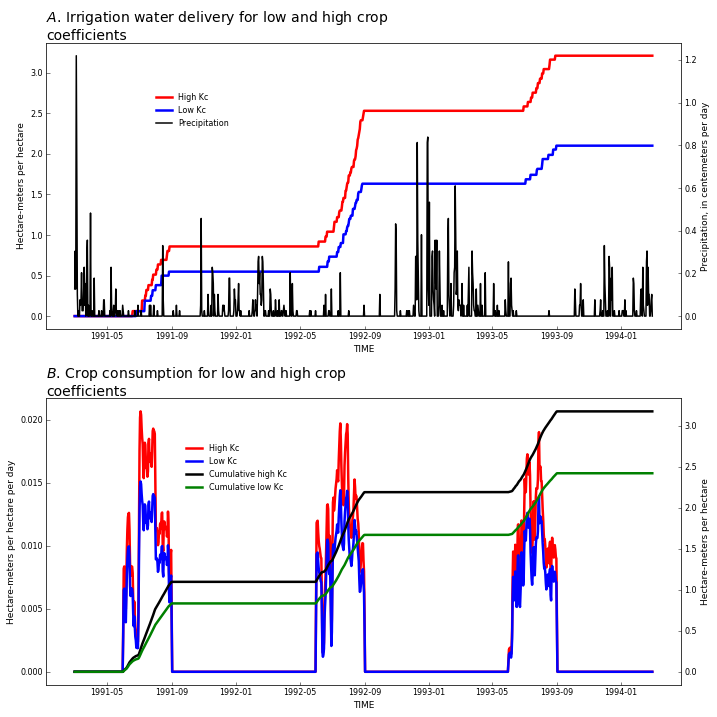

In [12]:
# blow up the fonts for this demo
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['axes.titlesize'] = 14

fig, axis = plt.subplots(2, 1, figsize=(10, 10))
axis = axis.flat

lns1 = axis[0].plot(plotdates,y4_high_18_cum,color='r', linewidth=2.5, label="High Kc")
lns2 = axis[0].plot(plotdates,y4_low_18_cum,color='b', linewidth=2.5, label="Low Kc")
ax2 = axis[0].twinx()  # instantiate a second axes that shares the same x-axis
#add precip as separate y-axis
lns3 = ax2.plot(plotdates, precip_cm, color='black', linewidth=1.5, label="Precipitation")
axis[0].set_ylabel('Hectare-meters per hectare')
axis[0].set_xlabel(header[0])

ax2.set_ylabel('Precipitation, in centemeters per day', color='black')  # we already handled the x-label with ax1

start, end = axis[0].get_xlim()
#axis[0].xaxis.set_ticks(np.arange(start, end, 90.0))
rf.title(axis[0], 'Irrigation water delivery for low and high crop coefficients', subplot_prefix='A')

# Set legend
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
axis[0].legend(lns, labs, loc=0, bbox_to_anchor=(.3, 0.85))

handles, labels = axis[0].get_legend_handles_labels()
#rf.legend(axis[0], handles, labels, bbox_to_anchor=(.9, 0.65))

# Second plot

lns1 = axis[1].plot(plotdates,y2et_high_18,color='r', linewidth=2.5, label="High Kc")
lns2 = axis[1].plot(plotdates,y2et_low_18,color='b', linewidth=2.5, label="Low Kc")
axis[1].set_ylabel('Hectare-meters per hectare per day')
axis[1].set_xlabel(header[0])
ax3 = axis[1].twinx()
lns3 = ax3.plot(plotdates, y2et_high_18_cum, color='black', linewidth=2.5, label="Cumulative high Kc")
lns4 = ax3.plot(plotdates, y2et_low_18_cum, color='green', linewidth=2.5, label="Cumulative low Kc")
ax3.set_ylabel('Hectare-meters per hectare', color='black')
# Set legend
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
axis[1].legend(lns, labs, loc=0, bbox_to_anchor=(.3, 0.65))

#rf.axis_numbering(axis[1], format_x=True)
fmt = mdates.DateFormatter('%Y-%m-%d')
rf.title(axis[1], 'Crop consumption for low and high crop coefficients', subplot_prefix='B')



plt.tight_layout()
plt.savefig('Fig9.png')

### Plot time series instead of cumulative

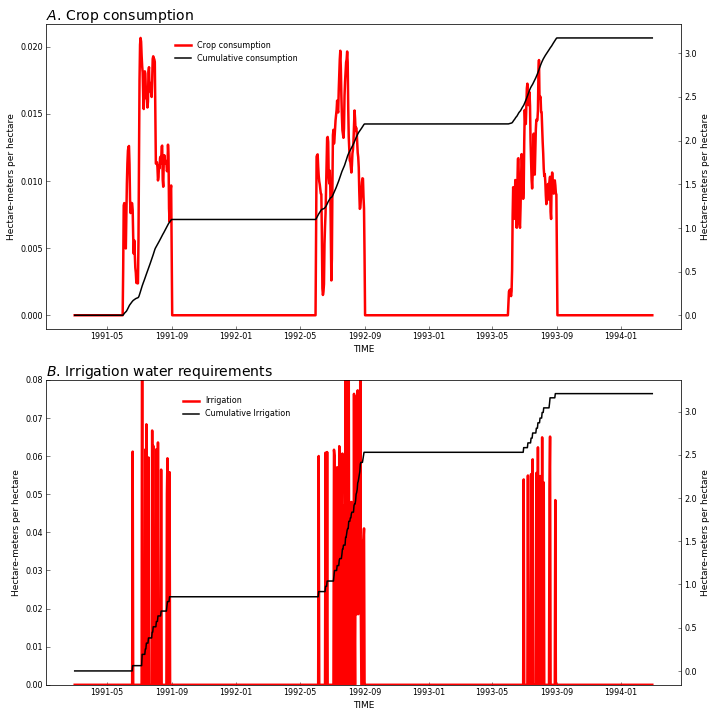

In [13]:
# blow up the fonts for this demo
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['axes.titlesize'] = 14

fig, axis = plt.subplots(2, 1, figsize=(10, 10))
axis = axis.flat

lns1=axis[1].plot(plotdates,y4_high_18,color='r', linewidth=2.5, label="Irrigation")

# set axis range to specified value
plt.xlim(plotdates[0],plotdates[len(plotdates)-1])
plt.ylim(0.0,0.08)

ax2 = axis[1].twinx()  # instantiate a second axes on ET plots that shares the same x-axis
#add precip as separate y-axis
lns2 = ax2.plot(plotdates, y4_high_18_cum, color='black', linewidth=1.5, label="Cumulative Irrigation")
axis[1].set_ylabel('Hectare-meters per hectare')
axis[1].set_xlabel(header[0])

ax2.set_ylabel('Hectare-meters per hectare', color='black')  # we already handled the x-label with ax1

start, end = axis[1].get_xlim()
#axis[0].xaxis.set_ticks(np.arange(start, end, 90.0))
rf.title(axis[1], 'Irrigation water delivery for low and high crop coefficients', subplot_prefix='A')

# Set legend
lns = lns1+lns2
labs = [l.get_label() for l in lns]
axis[1].legend(lns, labs, loc=0, bbox_to_anchor=(.3, 0.85))


lns3 = axis[0].plot(plotdates,y2et_high_18,color='r', linewidth=2.5, label="Crop consumption")

axis[0].set_ylabel('Hectare-meters per hectare')
axis[0].set_xlabel(header[0])

ax3 = axis[0].twinx()  # instantiate a second axes on NIWR plots that shares the same x-axis
#add precip as separate y-axis
lns4 = ax3.plot(plotdates, y2et_high_18_cum, color='black', linewidth=1.5, label="Cumulative consumption")

ax3.set_ylabel('Hectare-meters per hectare', color='black')  # we already handled the x-label with ax3

# Set legend
lns5 = lns3+lns4
labs = [l.get_label() for l in lns5]
axis[0].legend(lns, labs, loc=0, bbox_to_anchor=(.3, 0.85))


plt.ylabel('Hectare-meters per hectare')
plt.xlabel(header[0])

start, end = axis[0].get_xlim()
#axis[0].xaxis.set_ticks(np.arange(start, end, 90.0))

rf.title(axis[0], 'Crop consumption', subplot_prefix='A')

#rf.axis_numbering(axis[1], format_x=True)
fmt = mdates.DateFormatter('%Y-%m-%d')
rf.title(axis[1], 'Irrigation water requirements', subplot_prefix='B')

# Set legend
#handles, labels = axis[0].get_legend_handles_labels()
#rf.legend(axis[0], handles, labels, bbox_to_anchor=(.9, 0.15))

# Set legend
#handles, labels = axis[1].get_legend_handles_labels()
#rf.legend(axis[1], handles, labels, bbox_to_anchor=(.9, 0.15))

plt.tight_layout()
plt.savefig('WR_demand.pdf')